## 14. Transfer learning VGG16 + cifar **10**

In [20]:
# Libraries
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.datasets import mnist
import numpy as np

Train images shape: (50000, 32, 32, 3), Train labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


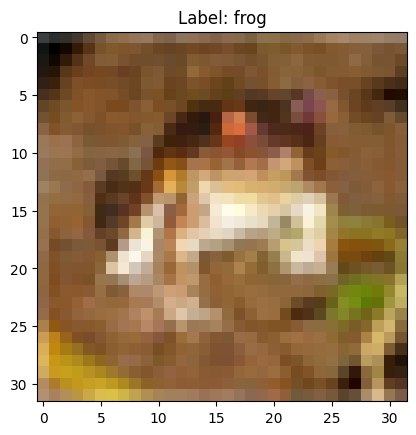

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalize input
train_images = train_images / 255
test_images = test_images / 255
# change target class to one hot encoding
# use ‘to_categorical’ function
num_classes = 10

# 14. 1)-1
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# 14. 1)-2
# Show the shapes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Display one sample image
plt.imshow(train_images[0])
plt.title(f"Label: {class_names[np.argmax(train_labels[0])]}")
plt.show()

In [22]:
# Create network model using transfer learning
# fine_tune: # of layers to be trainable
def create_model(input_shape, fine_tune=0):
  conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
# Defines how many layers trainable(updatable) during training.
# Layers in the convolutional base are set to non-trainable
# depending on the size of the fine-tuning parameter.
  if fine_tune > 0:
    for layer in conv_base.layers[:-fine_tune]:
      layer.trainable = False
  else:
    for layer in conv_base.layers:
      layer.trainable = False
# Create a few dense layers of the model (i.e. fully-connected layers).
# This is a new top_model onto the pretrained layers.
  flatten_layer = Flatten()

# 14. 1)-3
  dense1 = Dense(20, activation='relu')
  dense2 = Dense(10, activation='relu')
  output_layer = Dense(10, activation='softmax')

  model = models.Sequential([conv_base, flatten_layer, dense1, dense2, output_layer])
  return model

input_shape = train_images[0].shape
model = create_model(input_shape, fine_tune=0)
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 20)                  │          10,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,725,268 (56.17 MB)

 Trainable params: 10,580 (41.33 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [23]:
X_train = train_images
Y_train = train_labels
X_test = test_images
Y_test = test_labels

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3476 - loss: 1.8172 - val_accuracy: 0.5188 - val_loss: 1.3566
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5475 - loss: 1.3018 - val_accuracy: 0.5482 - val_loss: 1.2826
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5699 - loss: 1.2406 - val_accuracy: 0.5654 - val_loss: 1.2433
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5756 - loss: 1.2126 - val_accuracy: 0.5726 - val_loss: 1.2310
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5866 - loss: 1.1867 - val_accuracy: 0.5774 - val_loss: 1.2137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5901 - loss: 1.1698 - val_accuracy: 0.5761 - val_loss: 1.2184
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5984 - loss: 1.1577 - val_accuracy: 0.5818 - val_loss: 1.2069
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5996 - loss: 

In [24]:
# 2. change the number of layers to freeze


def create_model(input_shape, fine_tune=0):
    from keras.applications import VGG16
    from keras.models import Sequential
    from keras.layers import Dense, Flatten

    # Load VGG16
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a few dense layers
    flatten_layer = Flatten()
    dense1 = Dense(20, activation='relu')
    dense2 = Dense(10, activation='relu')
    output_layer = Dense(10, activation='softmax')

    model = Sequential([
        conv_base,
        Flatten(),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])

    return model

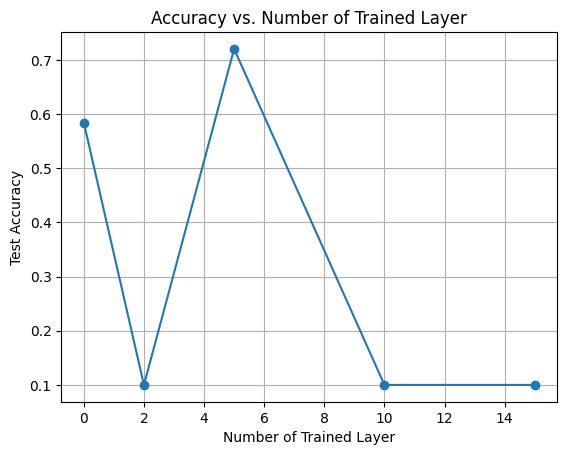

Number of trained layers: 5


In [25]:
import matplotlib.pyplot as plt

trainable_layers = [0, 2, 5, 10, 15]
accuracies = []

for fine_tune in trainable_layers:
    model = create_model(input_shape=X_train[0].shape, fine_tune=fine_tune)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test), verbose=0)

    _, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
    accuracies.append(test_accuracy)

# Plot a graph accuracy vs number oftrainable layers
plt.plot(trainable_layers, accuracies, marker='o')
plt.title("Accuracy vs. Number of Trained Layer")
plt.xlabel("Number of Trained Layer")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

# Find the optimal number of layers
optimal_layers = trainable_layers[accuracies.index(max(accuracies))]
print(f"Number of trained layers: {optimal_layers}")


Train Images Shape: (28, 28, 1)
Train Labels Shape: (28, 28, 1)
Test Images Shape: (28, 28, 1)
Test Labels Shape: (28, 28, 1)


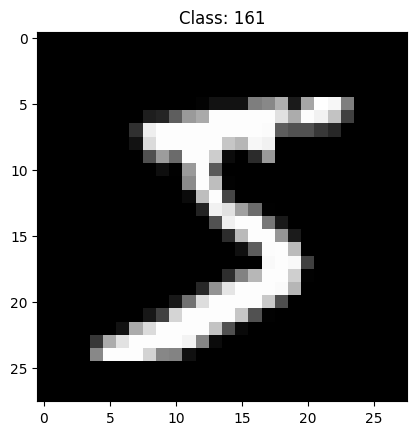

In [26]:
# 3. Use mnist dataset as an input and repeat above process
# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # Reshape and normalize
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# Update input shape
input_shape = X_train[0].shape

# Display dataset information and one sample image
print("Train Images Shape:", input_shape)
print("Train Labels Shape:", input_shape)
print("Test Images Shape:", input_shape)
print("Test Labels Shape:", input_shape)

plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title(f"Class: {np.argmax(X_train[0])}")
plt.show()


# **15. Gradient descent (RMSProp)**

In [27]:
# Define the function and its gradients
def f(x, y):
  return x**2 + 2*y +3*x
# Compute the derivative with respect to x
# 15. 1)-1
def f_der_x(x):
  return 2*x + 3

# Compute the derivative with respect to y
# 15. 1)-2 (2 pts)
def f_der_y(y):
  return 2

gamma = 0.8
lrate = 0.01
epsilon = 1e-8

# Accumulated gradient squares for x and y, respectively
# 𝐺𝑡 : gt_x and gt_y
gt_x = 0
gt_y = 0
# Initial values of x and y
x, y = 10.0, -10.
no_iterations = 100
# RMSProp optimization loop
# 15. 1)-3 (8 pts)

for i in range(no_iterations):
    grad_x = f_der_x(x)
    grad_y = f_der_y(y)

    gt_x = gamma * gt_x + (1 - gamma) * grad_x**2
    gt_y = gamma * gt_y + (1 - gamma) * grad_y**2

    x -= lrate / (np.sqrt(gt_x) + epsilon) * grad_x
    y -= lrate / (np.sqrt(gt_y) + epsilon) * grad_y

    print(f"Iteration = {i + 1}: x = {x}, y = {y}, f(x, y) = {f(x, y)}")

# 15. 1)-4 (2 pts)
print("Final x value:", x)
print("Final f value:", f(x, y))


Iteration = 1: x = 9.977639320246741, y = -10.022360679524997, f(x, y) = 109.44148300662407
Iteration = 2: x = 9.960987079971165, y = -10.039027346052775, f(x, y) = 109.02617015516043
Iteration = 3: x = 9.94669170842711, y = -10.053342304308163, f(x, y) = 108.67006645915764
Iteration = 4: x = 9.933699752615281, y = -10.06635678438086, f(x, y) = 108.34677646419303
Iteration = 5: x = 9.921528472675007, y = -10.07855263179074, f(x, y) = 108.0442073885444
Iteration = 6: x = 9.909912974517724, y = -10.090194272477708, f(x, y) = 107.75572554111247
Iteration = 7: x = 9.898691550226388, y = -10.101443123965321, f(x, y) = 107.47728280927181
Iteration = 8: x = 9.887758334916485, y = -10.112404848336283, f(x, y) = 107.20623019778733
Iteration = 9: x = 9.877040563916562, y = -10.123152056311914, f(x, y) = 106.94074788037905
Iteration = 10: x = 9.86648642865088, y = -10.133736432711798, f(x, y) = 106.67954086728105
Iteration = 11: x = 9.856058061748598, y = -10.144195741574611, f(x, y) = 106.421663

In [28]:
# 2. Add L2 regularization. You have to modify f, f_der_x, f-der_y functions.
lambda_reg = 0.01

def f(x, y):
    return x**2 + 2*y + 3*x + (lambda_reg / 2) * (x**2 + y**2)

def f_der_x(x):
    return 2*x + 3 + lambda_reg * x

def f_der_y(y):
    return 2 + lambda_reg * y


In [29]:
# 3. mplement AdaDelta. You have to define the following 𝑆𝑡 and modify the updaterule.

def f(x, y):
    return x**2 + 2*y + 3*x

def f_derivative(x, y):
    return 2*x + 3, 2  # Gradients for x and y

# AdaDelta parameters
gamma = 0.9
epsilon = 1e-6

# Initialize variables of x and y
G = [0, 0]
S = [0, 0]
w = [10.0, -10.0]
no_iterations = 100

for i in range(no_iterations):
    grad_x, grad_y = f_derivative(w[0], w[1])
    gradients = [grad_x, grad_y]

    # Update running avg
    for idx in range(2):
        G[idx] = gamma * G[idx] + (1 - gamma) * gradients[idx]**2
        delta_w = -np.sqrt(S[idx] + epsilon) / np.sqrt(G[idx] + epsilon) * gradients[idx]
        S[idx] = gamma * S[idx] + (1 - gamma) * delta_w**2
        w[idx] += delta_w

    print(f"Iteration {i + 1}: x = {w[0]:.4f}, y = {w[1]:.4f}, f(x, y) = {f(w[0], w[1]):.4f}")


Iteration 1: x = 9.9968, y = -10.0032, f(x, y) = 109.9210
Iteration 2: x = 9.9936, y = -10.0064, f(x, y) = 109.8399
Iteration 3: x = 9.9903, y = -10.0097, f(x, y) = 109.7574
Iteration 4: x = 9.9870, y = -10.0131, f(x, y) = 109.6739
Iteration 5: x = 9.9836, y = -10.0164, f(x, y) = 109.5896
Iteration 6: x = 9.9802, y = -10.0198, f(x, y) = 109.5045
Iteration 7: x = 9.9767, y = -10.0233, f(x, y) = 109.4187
Iteration 8: x = 9.9733, y = -10.0268, f(x, y) = 109.3323
Iteration 9: x = 9.9698, y = -10.0302, f(x, y) = 109.2454
Iteration 10: x = 9.9663, y = -10.0338, f(x, y) = 109.1580
Iteration 11: x = 9.9628, y = -10.0373, f(x, y) = 109.0702
Iteration 12: x = 9.9592, y = -10.0408, f(x, y) = 108.9819
Iteration 13: x = 9.9557, y = -10.0444, f(x, y) = 108.8931
Iteration 14: x = 9.9521, y = -10.0480, f(x, y) = 108.8040
Iteration 15: x = 9.9485, y = -10.0516, f(x, y) = 108.7145
Iteration 16: x = 9.9449, y = -10.0552, f(x, y) = 108.6246
Iteration 17: x = 9.9412, y = -10.0589, f(x, y) = 108.5343
Iterat


# 16. Bayesian **optimization**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
# Define the true function
# Suppose the true error function is cosine function
def true_function(X):
  return np.cos(X)
# Define the RBF (Radial Basis Function) kernel (Gaussian Kernel)
# Computes the RBF (Gaussian) kernel between two vectors X1 and X2.
# X1 : numpy array 1D (size=n)
# X2 : numpy array 1D (size=m)
# lambda(𝜆) : Kernel coefficient for RBF
# returns:
# K : numpy array of shape (size of X1=n, size of X2=m).
# 16. 1)-1
def rbf_kernel(X1, X2, lambda_=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    dist_sq = np.sum((X1[:, None] - X2[None, :])**2, axis=2)
    return np.exp(-lambda_ * dist_sq)

# Define the Gaussian Process Regression function
# 16. 1)-2
def gaussian_regression(X_train, y_train, X_test, lambda_=1.0):
    # Compute covariance matrices
    K = rbf_kernel(X_train, X_train, lambda_)
    K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(K)))  # Add small noise for numerical stability
    K_s = rbf_kernel(X_train, X_test, lambda_)
    K_ss = rbf_kernel(X_test, X_test, lambda_)

    # Compute mean and covariance
    mu = K_s.T @ K_inv @ y_train
    cov = K_ss - K_s.T @ K_inv @ K_s
    return mu.ravel(), np.diagonal(cov)


# Suppose you did the following 6 experiments changing the values of ‘X_train’.
# ‘y_train’ is its corresponding error function value
X_train = np.array([[1], [3], [5], [6], [7], [8]])
y_train = true_function(X_train).ravel()
# Let’s estimate the error function value when x=2.2
X_test=np.array([[2.2]])
# 16. 1)-3 (6 pts)
mu, variance = gaussian_regression(X_train, y_train, X_test)
sd = np.sqrt(variance)  # Standard deviation

print(f"Mean for X_test={X_test.ravel()}: {mu}")
print(f"Standard deviation for X_test={X_test.ravel()}: {sd}")


Mean for X_test=[2.2]: [-0.39531408]
Standard deviation for X_test=[2.2]: [0.8186543]


In [31]:
#2) Now change X_test to X_test=np.array([[3.4]]). Compute mean and s.d. of X_test=3.4
X_test = np.array([[3.4]])
mu, variance = gaussian_regression(X_train, y_train, X_test)
sd = np.sqrt(variance)

print(f"Mean for X_test={X_test.ravel()}: {mu}")
print(f"Standard deviation for X_test={X_test.ravel()}: {sd}")


Mean for X_test=[3.4]: [-0.84839268]
Standard deviation for X_test=[3.4]: [0.51890589]


In [32]:
# 3
X_test = np.linspace(0, 10, 10).reshape(-1, 1)

# Performing Gaussian Process Regression
mu, variance = gaussian_regression(X_train, y_train, X_test)
sd = np.sqrt(variance)

print("Mean vector:", mu)
print("Standard deviation vector:", sd)



Mean vector: [ 0.20538529  0.52354085 -0.42107827 -0.89106304 -0.04178221  0.68955817
  0.96515541  0.00303577 -0.15922685 -0.00707272]
Standard deviation vector: [0.92985002 0.15584423 0.80971034 0.44347815 0.63661006 0.30196153
 0.25098385 0.21292971 0.87663834 0.99980301]


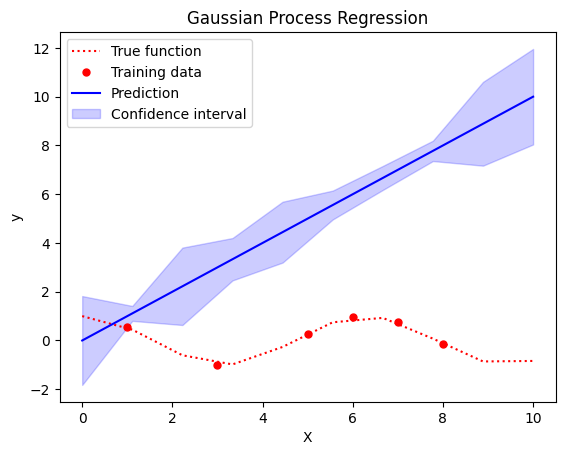

In [33]:
# 4
mean = X_test.ravel()
sd = np.sqrt(variance)

plt.figure()
plt.plot(X_test, true_function(X_test), 'r:', label="True function")
plt.plot(X_train, y_train, 'r.', markersize=10, label="Training data")
plt.plot(X_test, mean, 'b-', label="Prediction")
plt.fill_between(X_test.ravel(), mean - 1.96*sd, mean + 1.96*sd, alpha=0.2, color='b',
label="Confidence interval")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [34]:
# 5
kappa = 1.0

# Computing LCB for test points
LCB = mu - kappa * sd
print("Lower Confidence Bound (LCB):", LCB)

# Printing hyperparameter value
next_x = X_test[np.argmin(LCB)]
print(f"Next hyperparameter value: {next_x}")


Lower Confidence Bound (LCB): [-0.72446474  0.36769662 -1.23078861 -1.33454119 -0.67839227  0.38759664
  0.71417155 -0.20989395 -1.03586519 -1.00687573]
Next hyperparameter value: [3.33333333]
